In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set figure size, line width, and tick label size
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#mengecek spasi kosong
df.eq('').sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.shape

(1470, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Pengamatan:

- Data terdiri dari 1470 baris <br>
- Tidak ada data yang NULL/Missing Value <br>
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)<br>

In [10]:
#Mendefinisikan kolom yang di analisis
nums = df.select_dtypes('int')
cats = df.select_dtypes('object')

print('Numerical :')
print(list(nums))

print('\nCategorical :')
print(list(cats))

Numerical :
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical :
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## Descriptive

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [12]:
df.describe().loc[['mean', '50%']].T

,mean,50%
Age,36.923810,36.0
DailyRate,802.485714,802.0
DistanceFromHome,9.192517,7.0
Education,2.912925,3.0
EmployeeCount,1.000000,1.0
EmployeeNumber,1024.865306,1020.5
EnvironmentSatisfaction,2.721769,3.0
HourlyRate,65.891156,66.0
JobInvolvement,2.729932,3.0
JobLevel,2.063946,2.0


In [13]:
cats.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [14]:
df.columns[df.nunique() == 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

Observasi :

Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome` <br>
Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` , `EmployeeCount` dan `Over18`

In [15]:
#melihat unique value di setiap kolom bertipe object
for col in cats:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Attrition
Unique values: ['Yes', 'No']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

Column: Gender
Unique values: ['Female', 'Male']

Column: JobRole
Unique values: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']

Column: MaritalStatus
Unique values: ['Single', 'Married', 'Divorced']

Column: Over18
Unique values: ['Y']

Column: OverTime
Unique values: ['Yes', 'No']



# VIsualization

### Univariat

In [16]:
len(nums.columns)

26

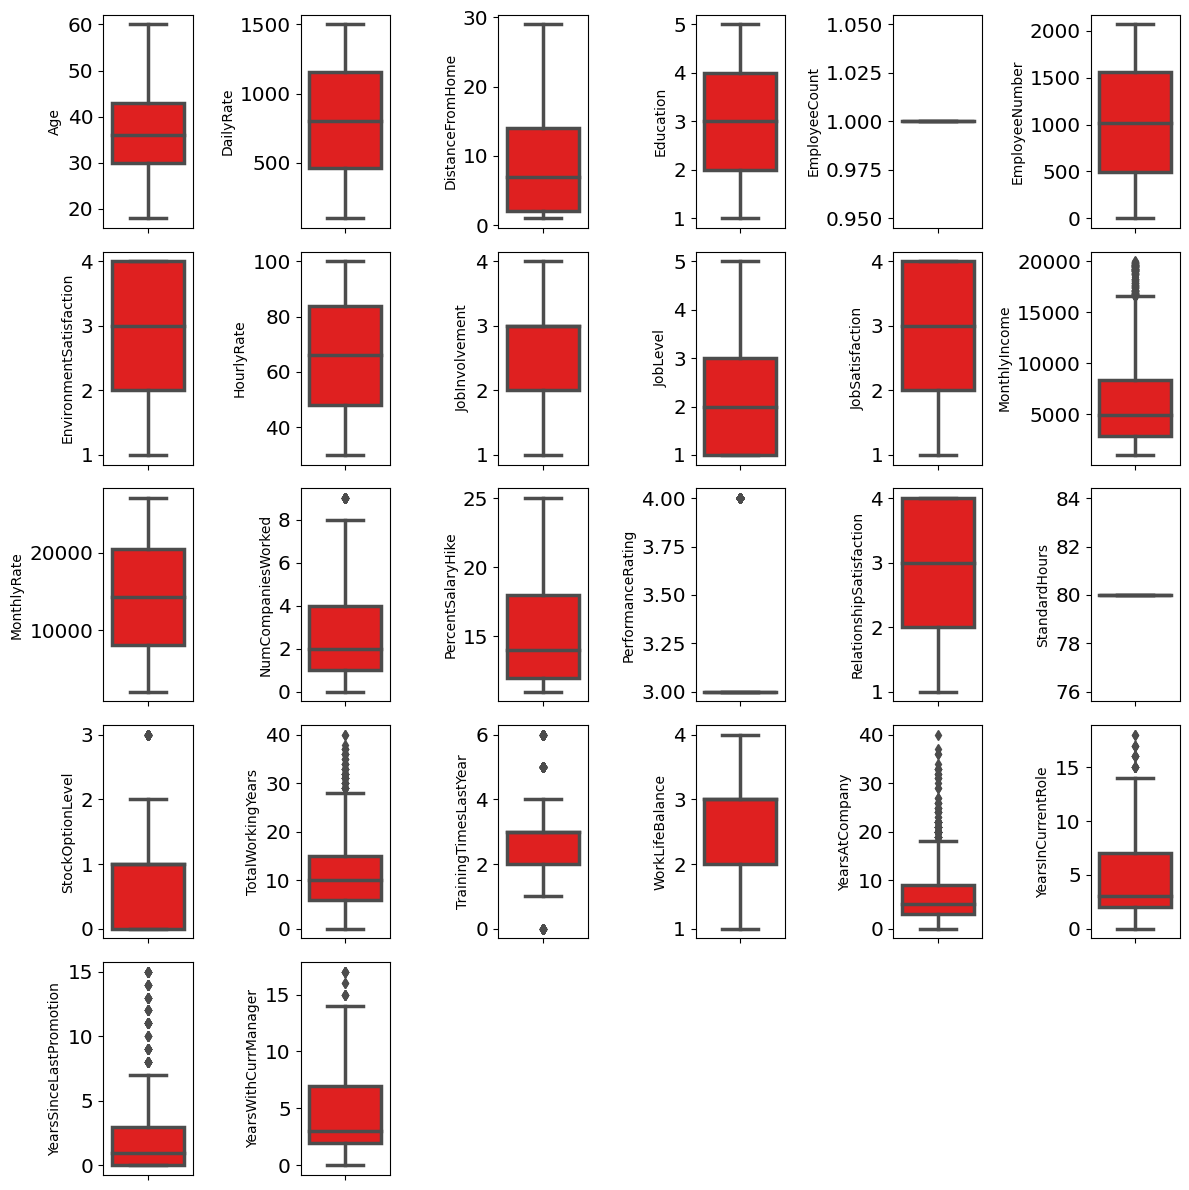

In [17]:
#incividual Boxplot(numeric)
import math
features = nums.columns
plt.figure(figsize=(12, 12))
for i in range(0, len(features)):
    plt.subplot(math.ceil(len(features) / 6), 6, i + 1)
    sns.boxplot(y=df[features[i]], color='r', orient='v')
    plt.tight_layout()

plt.show()

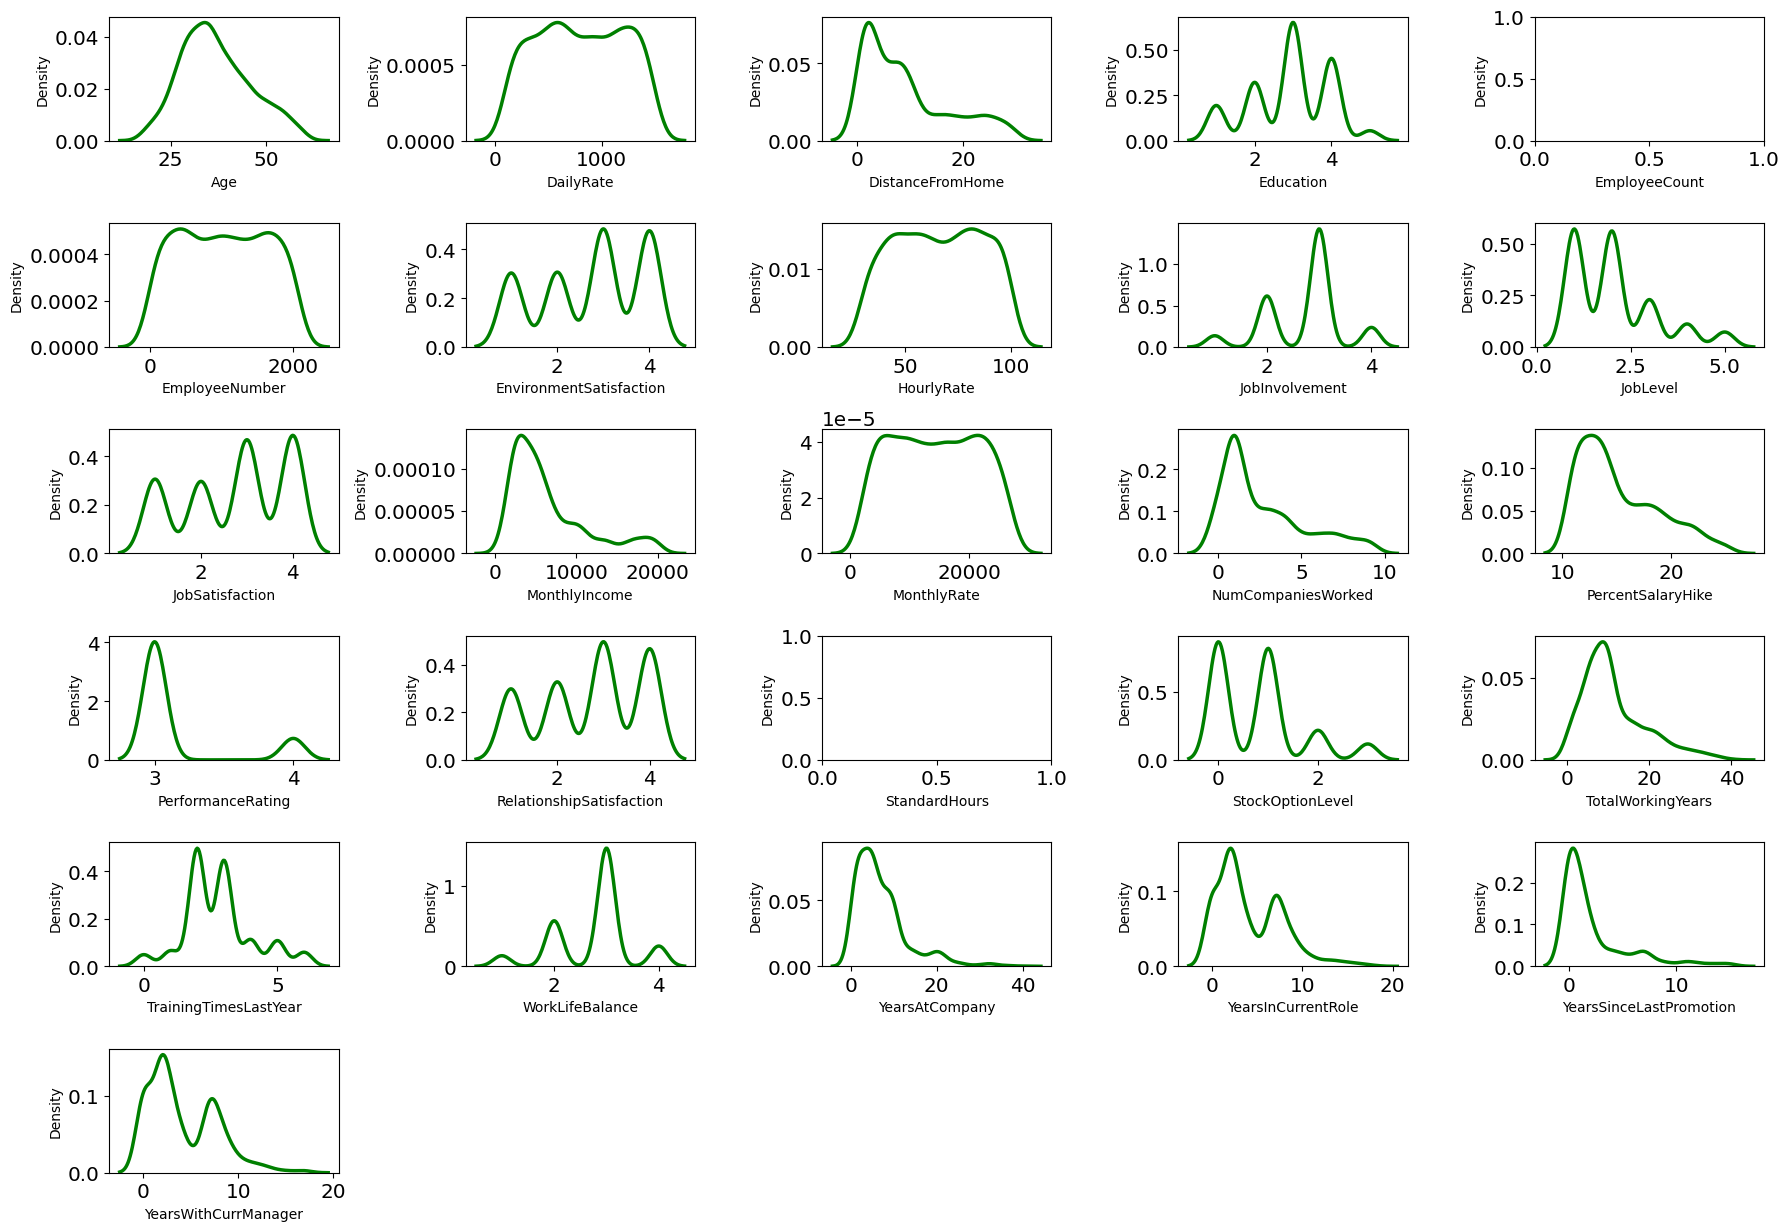

In [18]:
#displot
features = nums.columns
plt.figure(figsize=(18,14))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(features)/4), 5, i+1)
    sns.kdeplot(x=df[features[i]], color='g', warn_singular=False)
    plt.xlabel(features[i])
    plt.tight_layout()

### Bivariate

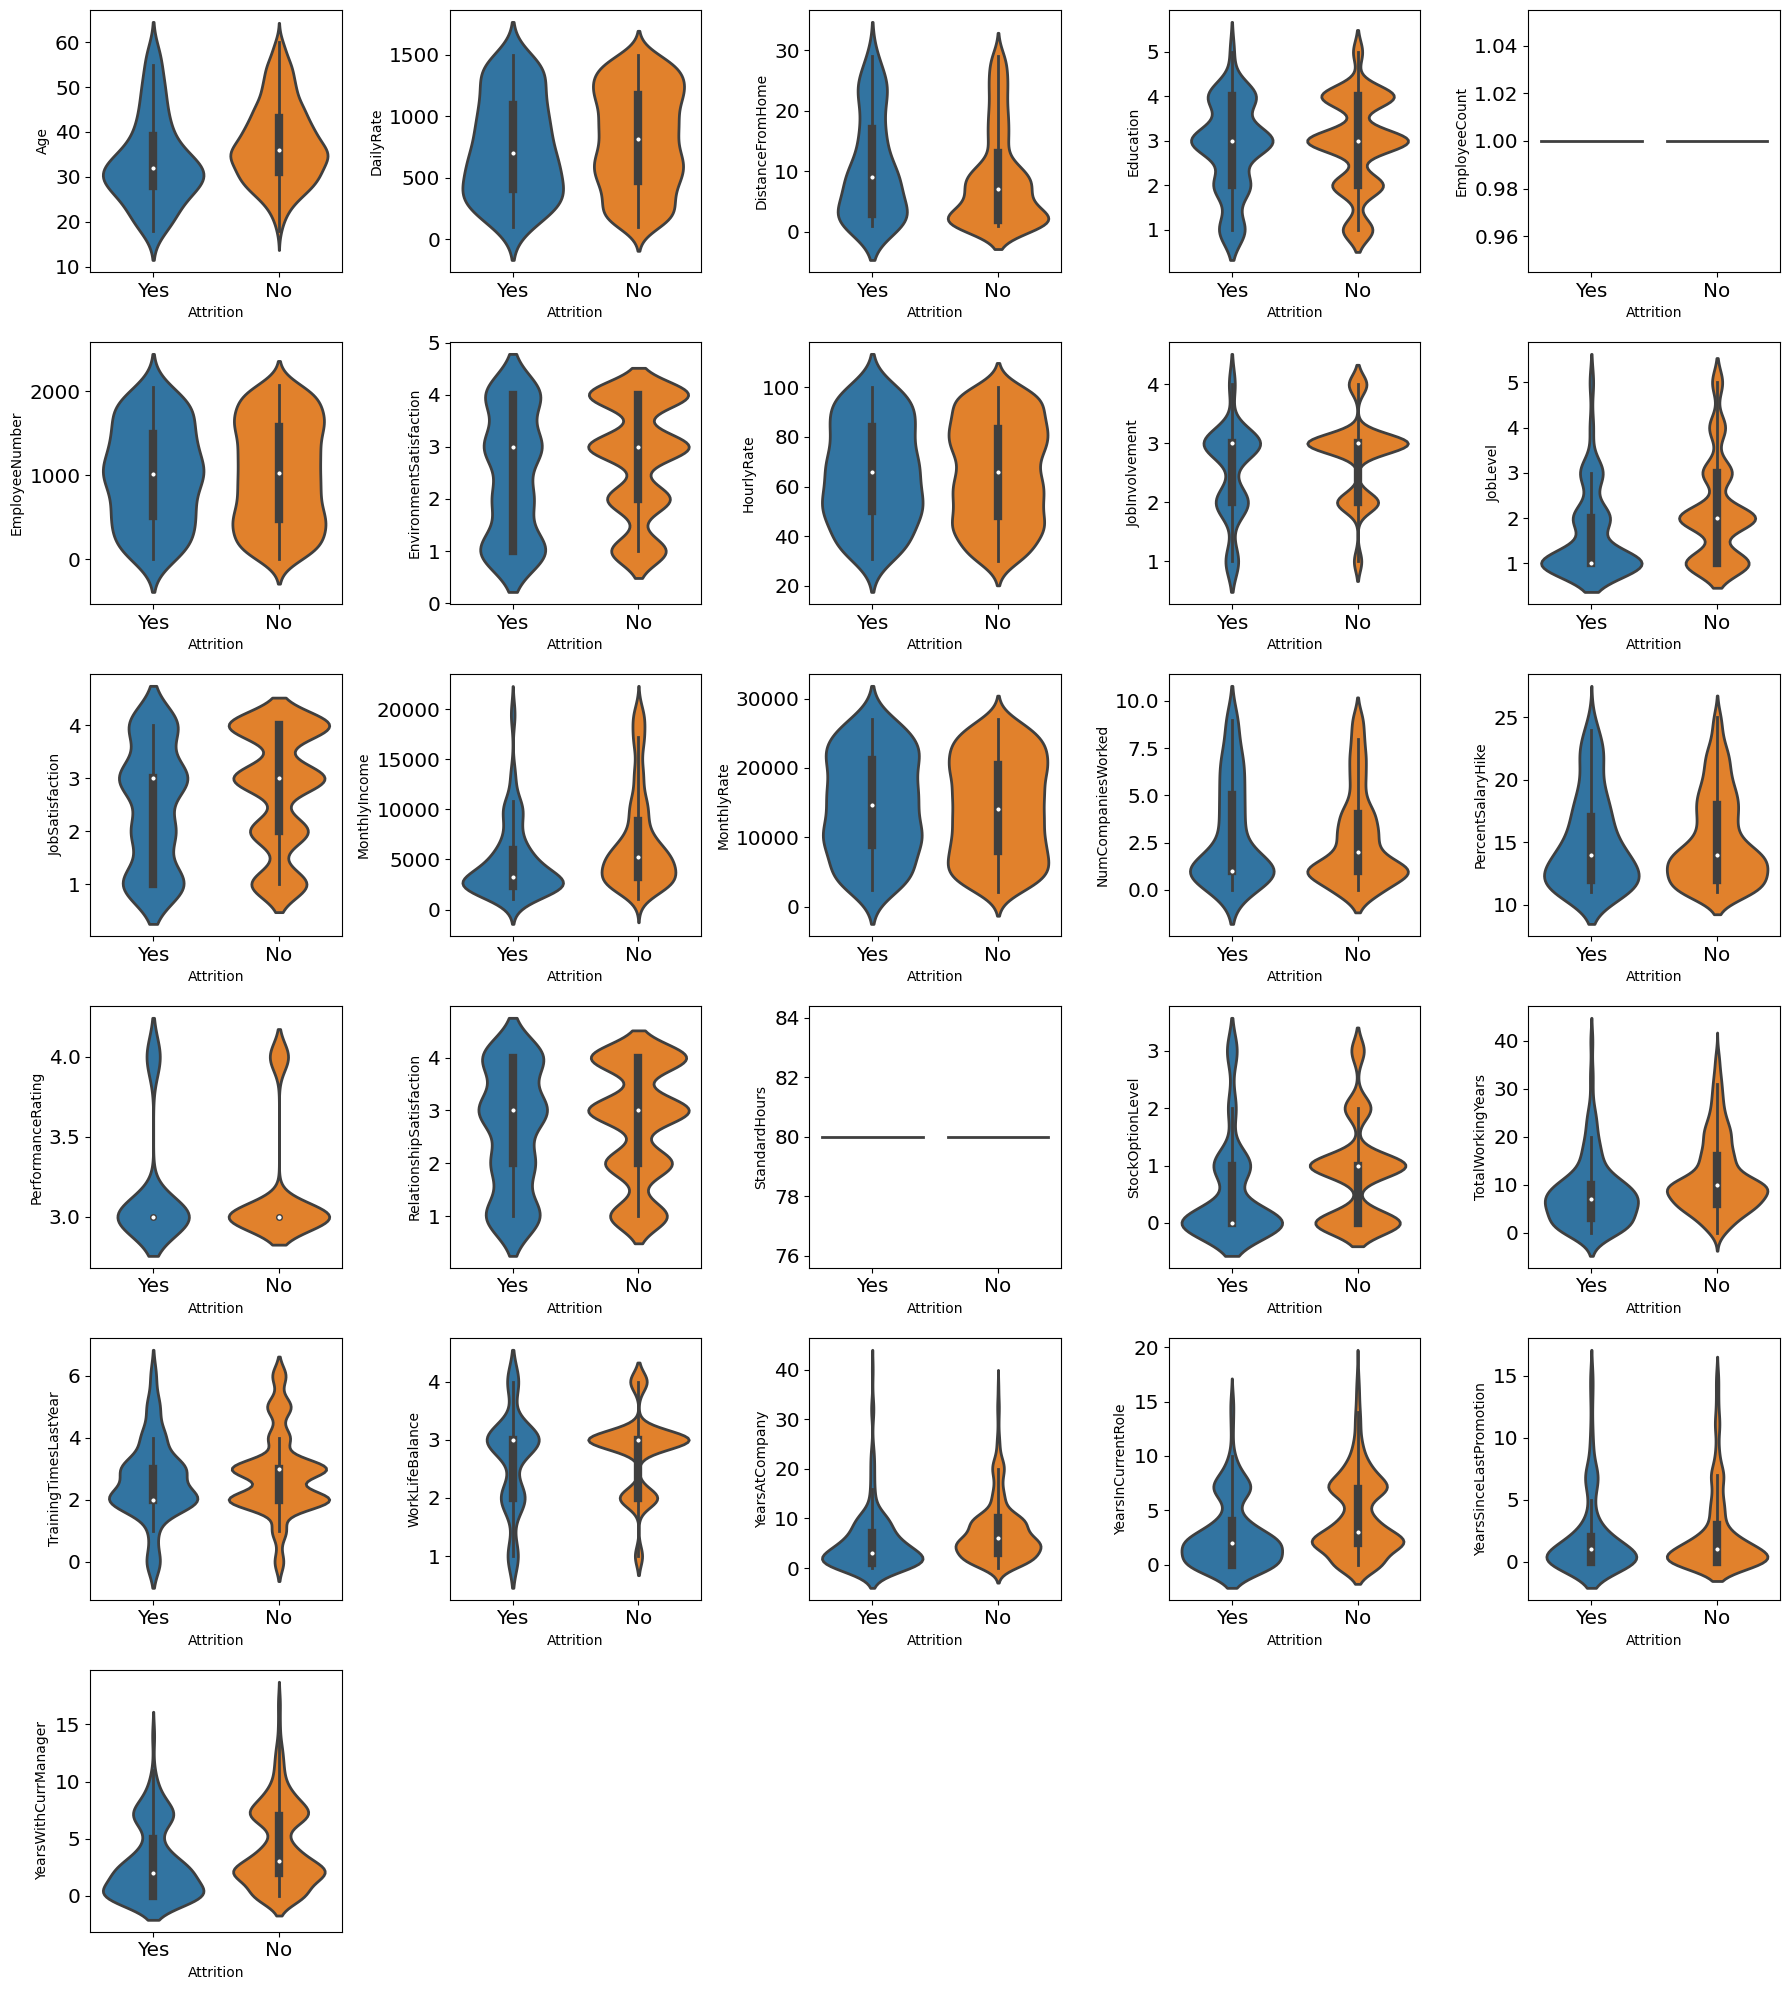

In [19]:
import math

plt.figure(figsize=(18, 20))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(features)/5), 5, i+1)
    sns.violinplot(data=df, y=features[i], x='Attrition', linewidth=2, orient='v')
    plt.tight_layout()

plt.show()
    

# Multivariate

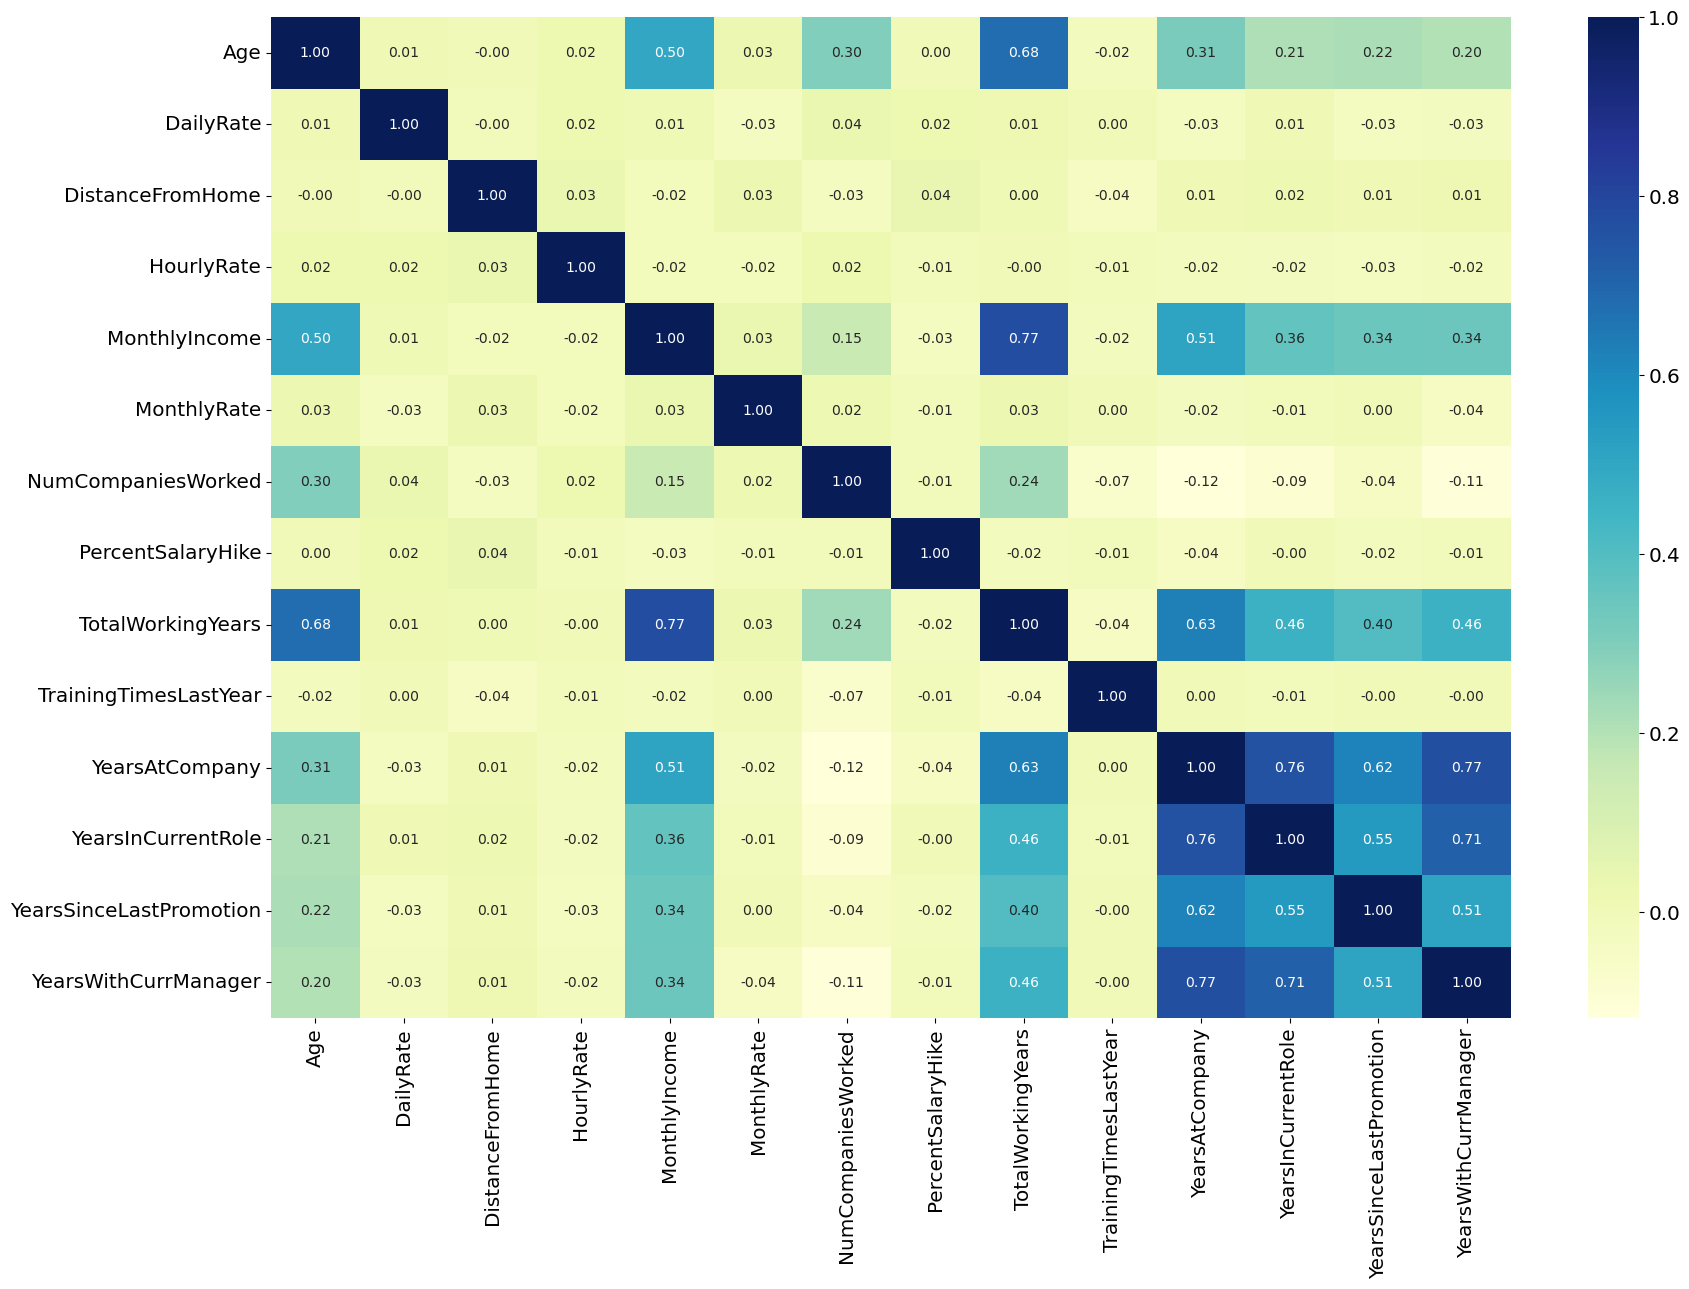

In [20]:
#heatmap

a = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
plt.figure(figsize=(20,13))
sns.heatmap(a.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

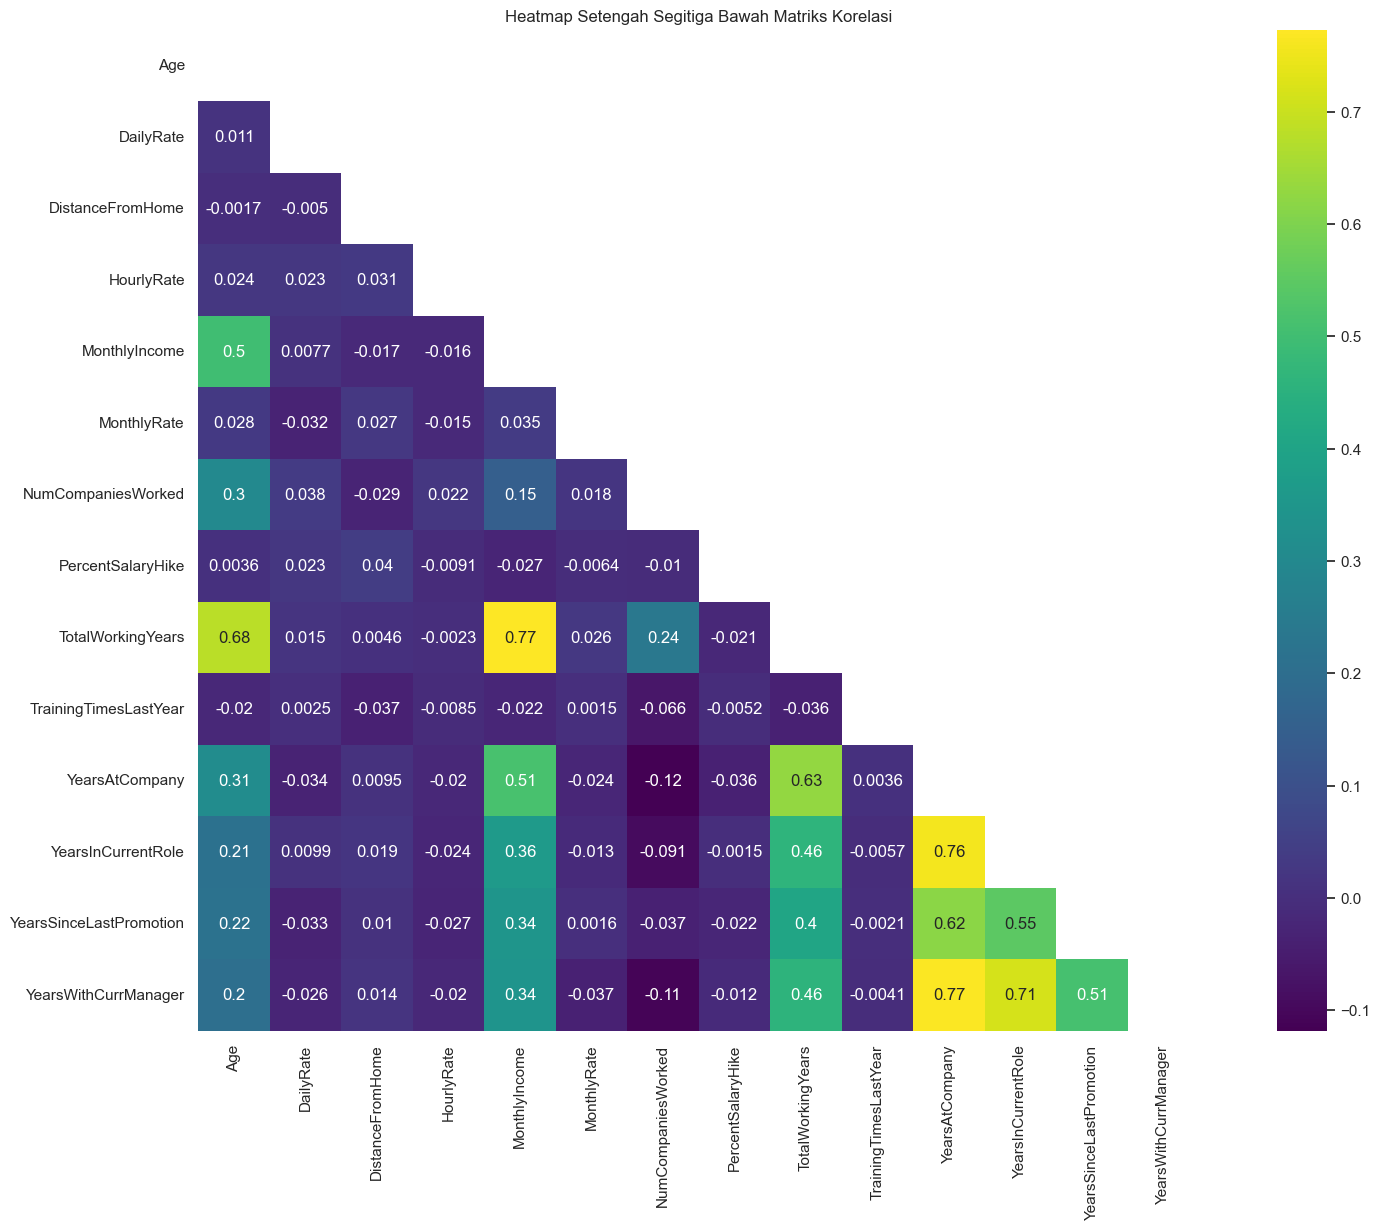

In [21]:
# Menghitung matriks korelasi untuk segitiga bawah
corr_matrix_lower = a.corr().where(np.tril(np.ones(a.corr().shape), k=-1).astype(bool))

# Membuat heatmap setengah segitiga bawah
plt.figure(figsize=(20, 13))
sns.set(style="white")
sns.heatmap(corr_matrix_lower, annot=True, cmap="viridis", square=True)

plt.title("Heatmap Setengah Segitiga Bawah Matriks Korelasi")
plt.show()

Observasi:

Berikut beberapa insight yang dapat kita tarik dari univariate dan multivariate analysis di atas.

#### Univariate:

- Terdapat beberapa kolom yang memiliki outlier (`MonthlyIncome` `NumCompaniesWorked` `PerformanceRating` `StockOptionLevel` `TotalWorkingYears` `WorkLifeBalance` `YearsAtCompany` `YearsInCurrentRole` `YearsSinceLastPromotion` `YearsWithCurrManager`) <br>
- Beberapa kolom mengalai positifly skewed
- Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome`
- Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `Over18`


#### Multivariate:
- Terdapat multicollinearity antara kolom <br>
`TotalWorkingYears` dan `MonthlyIncome`, <br>
`YearsInCurrentRole` dan `YearsAtComapny`, <br>
`YearsWithCurrManager` dan `YearsAtComapny`,  <br>
`YearsWithCurrManager` dan `YearsInCurrentRole` <br>
berarti kita bisa membuang salah satunya
- Korelasi antar beberpaa features memiliki nilai korelasi yang cukup tinggi namun tidak cukup tinggi hingga bisa dihapus salah satunya
- Ada 2 features yang tidak menampilkan nilai karena hanya memiliki 1 niali unik


# Preprocesing

## Handling Missing Value

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Obeservasi : 
- Tidak terdapat missing value pada semua features

## Handling duplicate data

In [24]:
df.duplicated().any()

False

#### Observsi :
- Tidak terdapat dtayang duplikat

## Feature Selection

In [25]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Observasi :
- drop feature yang tidak terlalu berpengaruh terhdapa target yaitu ` performa rating`
- drop feature yang memiliki 1 nilai unik
- drop feature yang jumlah uniknya sebanyak row data

In [26]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','PerformanceRating'], axis=1)

In [27]:
#df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','PerformanceRating','YearsInCurrentRole','YearsWithCurrManager'], axis=1)

## Feature Encoding

In [28]:
for col in cats:
    if col not in ['Over18']:
          print(f'value counts of column {col}')
          print(df[col].value_counts())
          print('---'*10, '\n')

value counts of column Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------ 

value counts of column BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------ 

value counts of column Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------ 

value counts of column EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------ 

value counts of column Gender
Male      882
Female    588
Name: Gender, dtype: int64
------------------------------ 

value counts of column JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufactur

#### Observasi :
- Label encoding : `Attrition`, `BusinessTravel`, `Gender`, `MaritalStatus`, `OverTime`
- One-hot ecnoding : `Department`, `EducationField`, `JobRole`

In [29]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'])
df['OverTime'] = label.fit_transform(df['OverTime'])
df['BusinessTravel']=label.fit_transform(df['BusinessTravel'])
df['Department']=label.fit_transform(df['Department'])
df['EducationField']=label.fit_transform(df['EducationField'])
df['Gender']=label.fit_transform(df['Gender'])
df['JobRole']=label.fit_transform(df['JobRole'])
df['MaritalStatus']=label.fit_transform(df['MaritalStatus'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2


In [30]:
'''df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':1})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':0})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Department'] = df['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2})
df['EducationField'] = df['EducationField'].map({'Life Sciences':0,'Medical':1,'Technical Degree':2,'Human Resources':3,'Marketing':4,'Other':5})
df['JobRole'] = df['JobRole'].map({'Sales Executive':0,'Sales Representative':0,'Research Scientist':1,'Research Director':1,'Laboratory Technician':2,'Healthcare Representative':2,'Manager':3,'Human Resources':3,'Manufacturing Director':4})'''

"df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1})\ndf['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':1})\ndf['Gender'] = df['Gender'].map({'Male':1,'Female':0})\ndf['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':0})\ndf['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})\ndf['Department'] = df['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2})\ndf['EducationField'] = df['EducationField'].map({'Life Sciences':0,'Medical':1,'Technical Degree':2,'Human Resources':3,'Marketing':4,'Other':5})\ndf['JobRole'] = df['JobRole'].map({'Sales Executive':0,'Sales Representative':0,'Research Scientist':1,'Research Director':1,'Laboratory Technician':2,'Healthcare Representative':2,'Manager':3,'Human Resources':3,'Manufacturing Director':4})"

In [31]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
Y

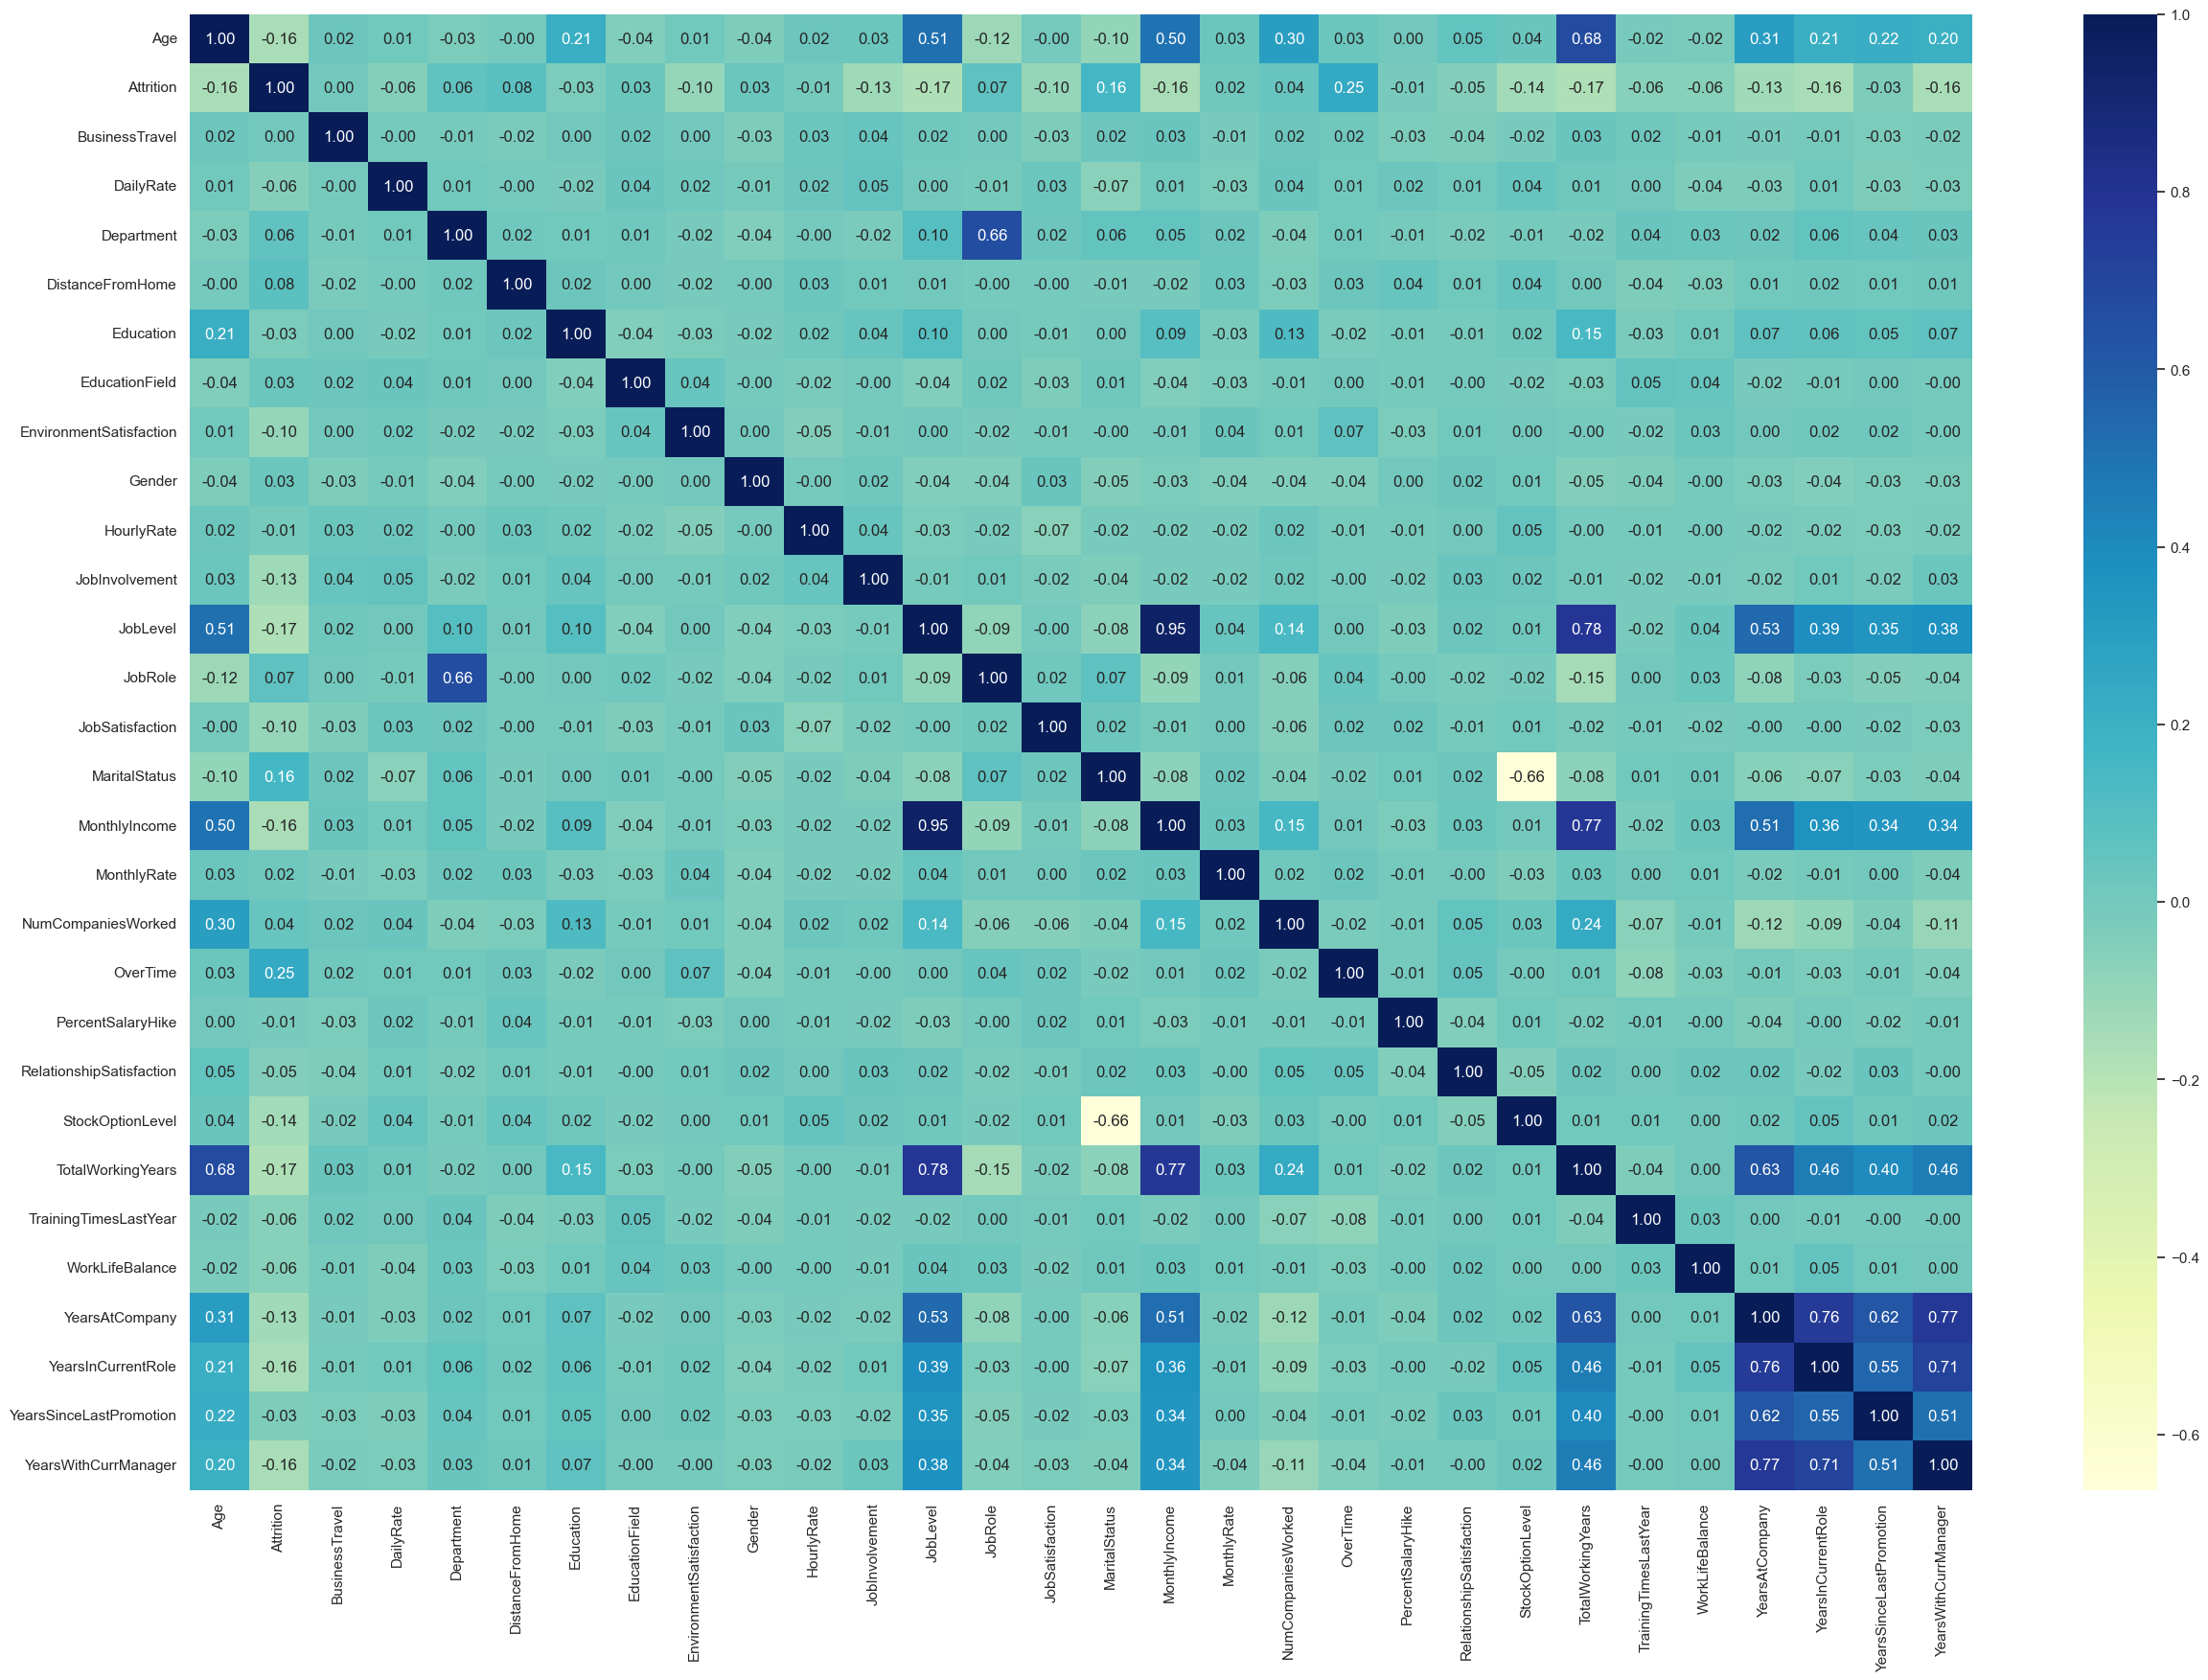

In [32]:
#heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

# Modelling

In [33]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [34]:
value_counts = df['Attrition'].value_counts()
value_counts

0    1233
1     237
Name: Attrition, dtype: int64

In [35]:
class_0_count = value_counts[0]
class_1_count = value_counts[1]
class_ratio = class_1_count / class_0_count
class_ratio

0.1922141119221411

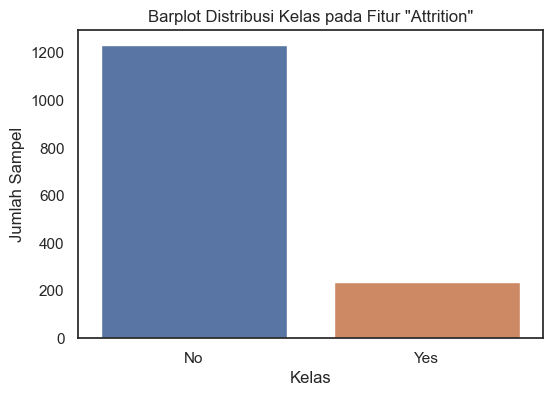

In [36]:
# Hitung frekuensi masing-masing nilai dalam kolom 'exclusive'
value_counts = df['Attrition'].value_counts()

# Buat barplot menggunakan Seaborn
plt.figure(figsize=(6, 4))
class_labels = ['No', 'Yes']
sns.barplot(x=class_labels, y=value_counts.values)
plt.title('Barplot Distribusi Kelas pada Fitur "Attrition"')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

## Split data

In [37]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,50,2,1126,1,1,2,3,4,1,66,3,4,5,4,0,17399,6615,9,0,22,3,1,32,1,2,5,4,1,3
135,36,2,216,1,6,2,3,2,1,84,3,2,4,2,0,4941,2819,6,0,20,4,2,7,0,3,3,2,0,1
1271,21,2,337,2,7,1,2,2,1,31,3,1,8,2,2,2679,4567,1,0,13,2,0,1,3,3,1,0,1,0
477,50,1,1246,0,3,3,3,1,1,99,3,5,3,2,1,18200,7999,1,0,11,3,1,32,2,3,32,5,10,7
806,52,2,994,1,7,4,1,2,1,87,3,3,0,2,2,10445,15322,7,0,19,4,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2,750,1,28,3,1,2,1,46,4,2,2,3,1,3407,25348,1,0,17,4,2,10,3,2,10,9,6,8
1294,41,2,447,1,5,3,1,2,1,85,4,2,0,2,2,6870,15530,3,0,12,1,0,11,3,1,3,2,1,2
860,22,1,1256,1,3,4,1,3,1,48,2,1,6,4,1,2853,4223,0,1,11,2,1,1,5,3,0,0,0,0
1459,29,2,1378,1,13,2,4,4,1,46,2,2,2,2,1,4025,23679,4,1,13,1,1,10,2,3,4,3,0,3


## Handling Outlier

In [40]:
#hapus outlier dengan z-score
from scipy import stats

print(f'Jumlah baris pada data pelatihan sebelum memfilter outlier: {len(X_train)}')

filtered_entries = np.array([True] * len(X_train))

for col in ['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
X_train = X_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
y_train = y_train[filtered_entries] # sesuaikan label juga

print(f'Jumlah baris pada data pelatihan setelah memfilter outlier: {len(X_train)}')
print(f'Jumlah baris pada data pengujian: {len(X_test)}')

Jumlah baris pada data pelatihan sebelum memfilter outlier: 1029
Jumlah baris pada data pelatihan setelah memfilter outlier: 973
Jumlah baris pada data pengujian: 441


## Imbalance class

In [41]:
'''from imblearn.over_sampling import SMOTE

# Membuat instance SMOTE dengan rasio oversampling 0.5 (sesuaikan sesuai kebutuhan)
smote = SMOTE(sampling_strategy=0.5)

# Melakukan oversampling pada data latihan
X_over_train, y_over_train = smote.fit_resample(X_train, y_train)'''


'from imblearn.over_sampling import SMOTE\n\n# Membuat instance SMOTE dengan rasio oversampling 0.5 (sesuaikan sesuai kebutuhan)\nsmote = SMOTE(sampling_strategy=0.5)\n\n# Melakukan oversampling pada data latihan\nX_over_train, y_over_train = smote.fit_resample(X_train, y_train)'

In [42]:
from imblearn.over_sampling import SMOTE
X_over_train,y_over_train = SMOTE().fit_resample(X_train,y_train)

In [43]:
X_train = X_over_train 
y_train = y_over_train 

In [44]:
print('Original')
print(pd.Series(y).value_counts())

print('\n')
print('OVERSAMPLING (SMOTE)')
print(pd.Series(y_train).value_counts())


Original
0    1233
1     237
Name: Attrition, dtype: int64


OVERSAMPLING (SMOTE)
0    802
1    802
Name: Attrition, dtype: int64


## Feature Scaling

In [45]:
cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
        'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
        'PercentSalaryHike','NumCompaniesWorked','MonthlyIncome',
        'MonthlyRate','DailyRate','HourlyRate','Age','DistanceFromHome']

In [46]:
'''cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears','YearsSinceLastPromotion',
        'PercentSalaryHike','NumCompaniesWorked','MonthlyIncome',
        'MonthlyRate','DailyRate','HourlyRate','Age','DistanceFromHome']'''

"cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears','YearsSinceLastPromotion',\n        'PercentSalaryHike','NumCompaniesWorked','MonthlyIncome',\n        'MonthlyRate','DailyRate','HourlyRate','Age','DistanceFromHome']"

In [47]:
'''
#untuk semua data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[cols] = ss.fit_transform(X[cols])'''


#hanya untuk data train
from sklearn.preprocessing import StandardScaler
numerical_features = cols
for n in numerical_features:
    scaler = StandardScaler()
    scaler.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])


'''from sklearn.preprocessing import MinMaxScaler
numerical_features = cols
for n in numerical_features:
    scaler = MinMaxScaler()
    scaler.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])'''

'from sklearn.preprocessing import MinMaxScaler\nnumerical_features = cols\nfor n in numerical_features:\n    scaler = MinMaxScaler()\n    scaler.fit(X_train[[n]])\n    X_train[n] = scaler.transform(X_train[[n]])\n    X_test[n] = scaler.transform(X_test[[n]])'

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)   
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)   
    
    print('Accuracy (train): %.2f%%' % (accuracy_score(y_train, y_pred_train) * 100))
    print('Accuracy (test): %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('Precision (train): %.2f' % (precision_score(y_train, y_pred_train)))   
    print('Precision (test): %.2f' % (precision_score(y_test, y_pred)))
    print('Recall (train): %.2f' % (recall_score(y_train, y_pred_train)))  
    print('Recall (test): %.2f' % (recall_score(y_test, y_pred)))
    print("ROC AUC (train): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("ROC AUC (test): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    # k-fold cross validation
    scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)  
    print('\nCross-validation results:')
    
    print('Accuracy (cross-val train): %.7f' % round(scores['train_accuracy'].mean(), 7))
    print('Accuracy (cross-val test): %.7f' % round(scores['test_accuracy'].mean(), 7))
    print('Precision (cross-val train): %.7f' % round(scores['train_precision'].mean(), 7))
    print('Precision (cross-val test): %.7f' % round(scores['test_precision'].mean(), 7))
    print('Recall (cross-val train): %.7f' % round(scores['train_recall'].mean(), 7))
    print('Recall (cross-val test): %.7f' % round(scores['test_recall'].mean(), 7))
    print('ROC AUC (cross-val train): %.7f' % round(scores['train_roc_auc'].mean(), 7))
    print('ROC AUC (cross-val test): %.7f' % round(scores['test_roc_auc'].mean(), 7))

    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# k-Nearest Neighbor

In [49]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (train): 87.47%
Accuracy (test): 71.88%
Precision (train): 0.80
Precision (test): 0.26
Recall (train): 1.00
Recall (test): 0.56
ROC AUC (train): 0.99
ROC AUC (test): 0.68

Cross-validation results:
Accuracy (cross-val train): 0.8676747
Accuracy (cross-val test): 0.8117309
Precision (cross-val train): 0.7949790
Precision (cross-val test): 0.7330533
Recall (cross-val train): 0.9909589
Recall (cross-val test): 0.9825233
ROC AUC (cross-val train): 0.9852429
ROC AUC (cross-val test): 0.9331421


# Decision Tree

In [50]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (train): 100.00%
Accuracy (test): 72.56%
Precision (train): 1.00
Precision (test): 0.23
Recall (train): 1.00
Recall (test): 0.41
ROC AUC (train): 1.00
ROC AUC (test): 0.59

Cross-validation results:
Accuracy (cross-val train): 1.0000000
Accuracy (cross-val test): 0.7874338
Precision (cross-val train): 1.0000000
Precision (cross-val test): 0.7666083
Recall (cross-val train): 1.0000000
Recall (cross-val test): 0.8214286
ROC AUC (cross-val train): 1.0000000
ROC AUC (cross-val test): 0.7872205


# RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (train): 100.00%
Accuracy (test): 85.94%
Precision (train): 1.00
Precision (test): 0.49
Recall (train): 1.00
Recall (test): 0.31
ROC AUC (train): 1.00
ROC AUC (test): 0.75

Cross-validation results:
Accuracy (cross-val train): 1.0000000
Accuracy (cross-val test): 0.8940460
Precision (cross-val train): 1.0000000
Precision (cross-val test): 0.9120742
Recall (cross-val train): 1.0000000
Recall (cross-val test): 0.8700776
ROC AUC (cross-val train): 1.0000000
ROC AUC (cross-val test): 0.9646028


# AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (train): 88.47%
Accuracy (test): 84.81%
Precision (train): 0.87
Precision (test): 0.46
Recall (train): 0.90
Recall (test): 0.59
ROC AUC (train): 0.96
ROC AUC (test): 0.77

Cross-validation results:
Accuracy (cross-val train): 0.8947952
Accuracy (cross-val test): 0.8385611
Precision (cross-val train): 0.8886896
Precision (cross-val test): 0.8397435
Recall (cross-val train): 0.9027386
Recall (cross-val test): 0.8276708
ROC AUC (cross-val train): 0.9644050
ROC AUC (cross-val test): 0.9237763


# XGB


In [53]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (train): 100.00%
Accuracy (test): 84.35%
Precision (train): 1.00
Precision (test): 0.42
Recall (train): 1.00
Recall (test): 0.33
ROC AUC (train): 1.00
ROC AUC (test): 0.80

Cross-validation results:
Accuracy (cross-val train): 1.0000000
Accuracy (cross-val test): 0.8990304
Precision (cross-val train): 1.0000000
Precision (cross-val test): 0.9056006
Recall (cross-val train): 1.0000000
Recall (cross-val test): 0.8888043
ROC AUC (cross-val train): 1.0000000
ROC AUC (cross-val test): 0.9627112


# Hyperparameter Tuning

## k-Nearest Neighbor

In [54]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn = KNeighborsClassifier()
knn_tun = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
knn_tun.fit(X_train, y_train)


eval_classification(knn_tun)



Accuracy (train): 91.08%
Accuracy (test): 72.56%
Precision (train): 0.85
Precision (test): 0.24
Recall (train): 0.99
Recall (test): 0.44
ROC AUC (train): 0.99
ROC AUC (test): 0.70

Cross-validation results:
Accuracy (cross-val train): 0.8974424
Accuracy (cross-val test): 0.8304459
Precision (cross-val train): 0.8380806
Precision (cross-val test): 0.7690401
Recall (cross-val train): 0.9862826
Recall (cross-val test): 0.9450078
ROC AUC (cross-val train): 0.9850796
ROC AUC (cross-val test): 0.9353885


## Decision Tree

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tun = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
dt_tun.fit(X_train, y_train)

# Predict & Evaluation
#y_pred = dt_tun.predict(X_test)#Check performa dari model
eval_classification(dt_tun)

Accuracy (train): 93.08%
Accuracy (test): 78.23%
Precision (train): 0.95
Precision (test): 0.25
Recall (train): 0.91
Recall (test): 0.30
ROC AUC (train): 0.99
ROC AUC (test): 0.59

Cross-validation results:
Accuracy (cross-val train): 0.8502242
Accuracy (cross-val test): 0.7767991
Precision (cross-val train): 0.8579824
Precision (cross-val test): 0.7791571
Recall (cross-val train): 0.8394560
Recall (cross-val test): 0.7715916
ROC AUC (cross-val train): 0.9342454
ROC AUC (cross-val test): 0.8425411


## Bagging: Random Forest

In [56]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tun = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rf_tun.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(rf_tun)

Accuracy (train): 97.82%
Accuracy (test): 83.45%
Precision (train): 0.98
Precision (test): 0.37
Recall (train): 0.97
Recall (test): 0.28
ROC AUC (train): 1.00
ROC AUC (test): 0.75

Cross-validation results:
Accuracy (cross-val train): 0.9767774
Accuracy (cross-val test): 0.8772216
Precision (cross-val train): 0.9832629
Precision (cross-val test): 0.8941487
Recall (cross-val train): 0.9700750
Recall (cross-val test): 0.8513587
ROC AUC (cross-val train): 0.9976640
ROC AUC (cross-val test): 0.9480365


## Boosting: Adaboost

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tun = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring = 'roc_auc')
ab_tun.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tun)


Accuracy (train): 90.71%
Accuracy (test): 84.13%
Precision (train): 0.90
Precision (test): 0.44
Recall (train): 0.91
Recall (test): 0.59
ROC AUC (train): 0.97
ROC AUC (test): 0.78

Cross-validation results:
Accuracy (cross-val train): 0.9124078
Accuracy (cross-val test): 0.8504089
Precision (cross-val train): 0.9061636
Precision (cross-val test): 0.8530814
Recall (cross-val train): 0.9201962
Recall (cross-val test): 0.8388820
ROC AUC (cross-val train): 0.9736034
ROC AUC (cross-val test): 0.9285915


## Boosting: XGBoost

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tun = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tun.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tun)

Accuracy (train): 99.75%
Accuracy (test): 84.58%
Precision (train): 1.00
Precision (test): 0.44
Recall (train): 1.00
Recall (test): 0.41
ROC AUC (train): 1.00
ROC AUC (test): 0.81

Cross-validation results:
Accuracy (cross-val train): 0.9945444
Accuracy (cross-val test): 0.8859365
Precision (cross-val train): 0.9956497
Precision (cross-val test): 0.9018584
Recall (cross-val train): 0.9934550
Recall (cross-val test): 0.8675466
ROC AUC (cross-val train): 0.9995660
ROC AUC (cross-val test): 0.9543766


### Best Parameter

In [59]:
ab_tun.best_params_

{'n_estimators': 1176,
 'learning_rate': 0.0681608040201005,
 'algorithm': 'SAMME.R'}

### Feature Importance

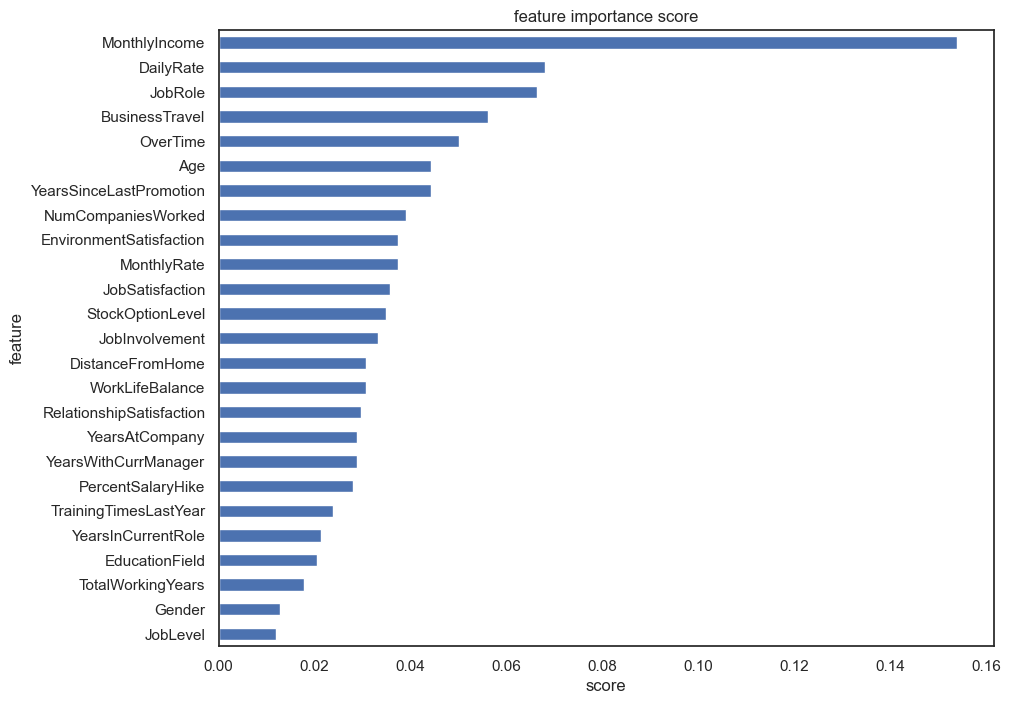

In [67]:
### Feature Importance
# List of hyperparameter
hyperparameters = {
    'n_estimators': 1176,
    'learning_rate': 0.0681608040201005,
    'algorithm': 'SAMME.R'
}

# Init model
ab_best = AdaBoostClassifier(random_state=42, **hyperparameters)

# Fit the model
ab_best.fit(X, y)

# Show feature importance
show_feature_importance(ab_best)


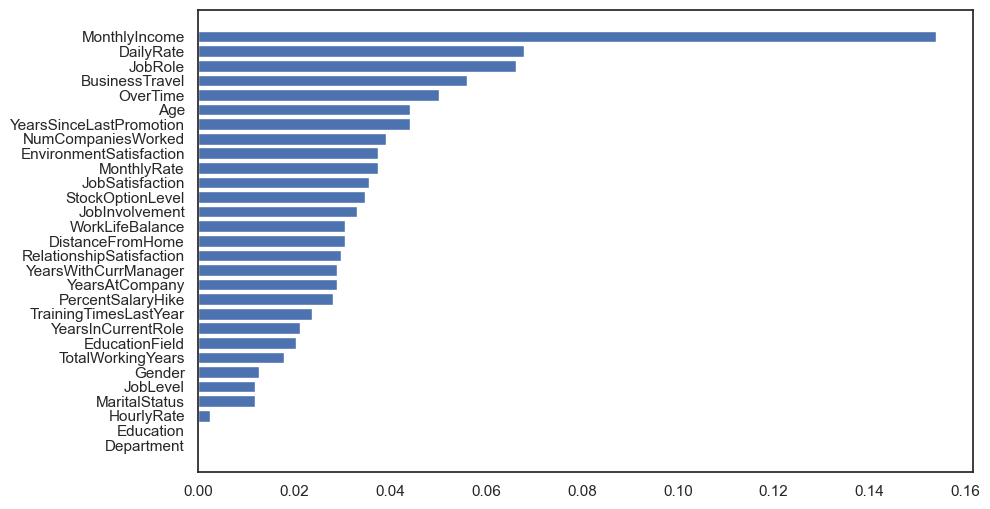

In [69]:
ab_best.fit(X,y)
# importance = best_LR.coef_[0]
importance = ab_best.feature_importances_
plt.figure(figsize=(10,6))
feature_importdf= pd.DataFrame({'feature':X.columns,'import':importance})
feature_importdf= feature_importdf.sort_values(by='import')
plt.barh(feature_importdf['feature'],feature_importdf['import'])
plt.show()

In [81]:
'''import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Misalnya, menggunakan model XGBClassifier yang sudah dilatih
model = ab_best
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Definisikan label kelas
labels = ['No Attrition', 'Attrition']

# Buat tampilan gambar confusion matrix dengan colormap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()'''


"import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import confusion_matrix\n\n# Misalnya, menggunakan model XGBClassifier yang sudah dilatih\nmodel = ab_best\nmodel.fit(X_train, y_train)\n\n# Melakukan prediksi pada data pengujian\ny_pred = model.predict(X_test)\n\n# Membuat confusion matrix\ncm = confusion_matrix(y_test, y_pred)\n\n# Definisikan label kelas\nlabels = ['No Attrition', 'Attrition']\n\n# Buat tampilan gambar confusion matrix dengan colormap\nplt.figure(figsize=(6, 4))\nsns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.title('Confusion Matrix')\nplt.show()"

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cm_model(x):
    x.fit(X_train, y_train)
    
    pre_train = x.predict(X_train)
    cm_train = confusion_matrix(y_train, pre_train, labels=x.classes_)
    
    pre_test = x.predict(X_test)
    cm_test = confusion_matrix(y_test, pre_test, labels=x.classes_)
    
    return cm_train,cm_test

def cm_plot(x):
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[0],
                          display_labels=x.classes_)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[1],
                          display_labels=x.classes_)
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    disp_train.plot(ax=ax[0])
    disp_test.plot(ax=ax[1])
    ax[0].set_title('train')
    ax[0].text(0,0.2,'TN')
    ax[0].text(1,0.2,'FP', color='white')
    ax[0].text(0,0.8,'FN', color='white')
    ax[0].text(1,0.8,'TP')
                
    ax[1].set_title('test')
    ax[1].text(0,0.2,'TN')
    ax[1].text(1,0.2,'FP', color='white')
    ax[1].text(0,0.8,'FN', color='white')
    ax[1].text(1,0.8,'TP', color='white')
    plt.tight_layout()
    plt.show()

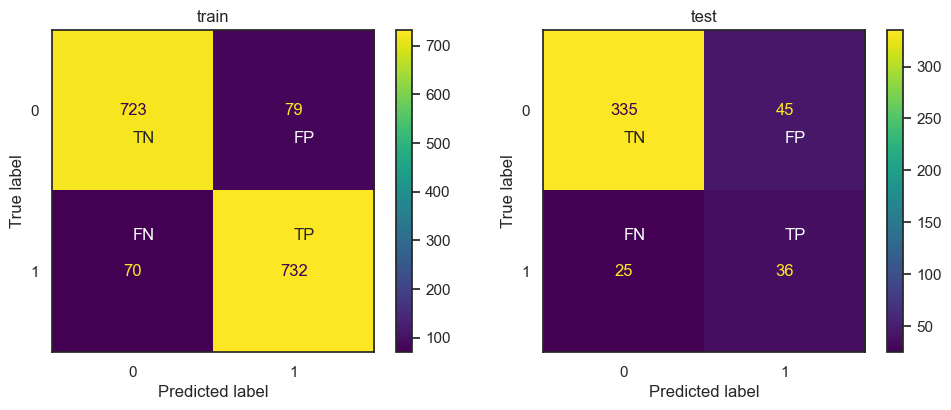

In [80]:
cm_plot(ab_best)

# Draw the Plots

In [84]:
ab_plot = ab_best
ab_plot.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.0681608040201005, n_estimators=1176,
                   random_state=42)

In [87]:
!pip install eli5

     ------------------------------------- 216.2/216.2 kB 28.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 47.0/47.0 kB 39.9 kB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107768 sha256=27860486ab5671602886ed408a992654a993effe5a9ad5944028fc5694602541
  Stored in directory: c:\users\al qarani\appdata\local\pip\cache\wheels\79\6c\4b\13ea3238d017bc19711b4312359e2c95be91a1a9d60d949572
Successfully built eli5


In [88]:
import eli5
from eli5.sklearn import PermutationImportance

# Misalnya, menggunakan model AdaBoostClassifier yang sudah dilatih (ab_best)
perm = PermutationImportance(ab_best, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.0263 ± 0.0187,StockOptionLevel
0.0254 ± 0.0044,OverTime
0.0245 ± 0.0202,EnvironmentSatisfaction
0.0218 ± 0.0130,BusinessTravel
0.0218 ± 0.0238,JobSatisfaction
0.0204 ± 0.0064,JobInvolvement
0.0172 ± 0.0054,Age
0.0136 ± 0.0115,WorkLifeBalance
0.0136 ± 0.0076,TrainingTimesLastYear
0.0127 ± 0.0062,JobLevel


# Save Model

In [89]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [90]:
# Define the hyperparameters
ab_baru_params = {
    'n_estimators': 1176,
    'learning_rate': 0.0681608040201005,
    'algorithm': 'SAMME.R'
}

# Create and fit the XGBoost model with the specified hyperparameters
ab_baru = AdaBoostClassifier(**ab_baru_params, random_state=42)
ab_baru.fit(X,y)

AdaBoostClassifier(learning_rate=0.0681608040201005, n_estimators=1176,
                   random_state=42)

In [91]:
import joblib

In [93]:
joblib.dump(ab_baru,'attrition_status_predict')

['attrition_status_predict']

In [94]:
model = joblib.load('attrition_status_predict')

In [95]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [96]:
import pandas as pd
df = pd.DataFrame({
    'Age': 37,
    'BusinessTravel': 1,
    'DailyRate': 1373,
    'Department': 1,
    'DistanceFromHome': 2,
    'Education': 2,
    'EducationField': 5,
    'EnvironmentSatisfaction': 4,
    'Gender': 1,
    'HourlyRate': 92,
    'JobInvolvement': 2,
    'JobLevel': 1,
    'JobRole': 2,
    'JobSatisfaction': 3,
    'MaritalStatus': 0,
    'MonthlyIncome': 2090,
    'MonthlyRate': 2396,
    'NumCompaniesWorked': 6,
    'OverTime': 1,
    'PercentSalaryHike': 15,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 7,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 0,
    'YearsInCurrentRole': 0,
    'YearsSinceLastPromotion': 0,
    'YearsWithCurrManager': 0
},index=[0])

In [97]:
result = model.predict(df)

In [98]:
if result==1:
    print("Attrition 'Yes'")
else:
    print("Attrition 'No'")

Attrition 'Yes'


# GUI

In [99]:
import pandas as pd
from tkinter import *
import joblib

def show_entry():
    # Ambil nilai dari Entry fields
    feature_values = [float(entry.get()) for entry in entry_fields]
    
    # Load model yang telah disimpan sebelumnya
    model = joblib.load('attrition_status_predict')

    # Buat DataFrame sesuai dengan fitur-fitur yang dimasukkan
    df = pd.DataFrame({
        'Age': feature_values[0],
        'BusinessTravel': feature_values[1],
        'DailyRate': feature_values[2],
        'Department': feature_values[3],
        'DistanceFromHome': feature_values[4],
        'Education': feature_values[5],
        'EducationField': feature_values[6],
        'EnvironmentSatisfaction': feature_values[7],
        'Gender': feature_values[8],
        'HourlyRate': feature_values[9],
        'JobInvolvement': feature_values[10],
        'JobLevel': feature_values[11],
        'JobRole': feature_values[12],
        'JobSatisfaction': feature_values[13],
        'MaritalStatus': feature_values[14],
        'MonthlyIncome': feature_values[15],
        'MonthlyRate': feature_values[16],
        'NumCompaniesWorked': feature_values[17],
        'OverTime': feature_values[18],
        'PercentSalaryHike': feature_values[19],
        'RelationshipSatisfaction': feature_values[20],
        'StockOptionLevel': feature_values[21],
        'TotalWorkingYears': feature_values[22],
        'TrainingTimesLastYear': feature_values[23],
        'WorkLifeBalance': feature_values[24],
        'YearsAtCompany': feature_values[25],
        'YearsInCurrentRole': feature_values[26],
        'YearsSinceLastPromotion': feature_values[27],
        'YearsWithCurrManager': feature_values[28]
    }, index=[0])

    # Lakukan prediksi
    result = model.predict(df)

    # Tampilkan hasil prediksi
    if result == 1:
        Label(master, text="Attrition 'YES'").grid(row=len(feature_labels) + 2, columnspan=2)
    else:
        Label(master, text="Attrition 'NO'").grid(row=len(feature_labels) + 2, columnspan=2)

master = Tk()
master.title("Attrition Status Prediction Using Machine Learning")
label = Label(master, text="Attrition Status Prediction", bg="black", fg="white").grid(row=0, columnspan=2)

# Label untuk setiap fitur
feature_labels = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 
    'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 
    'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Entry fields untuk setiap fitur
entry_fields = []

for i, label in enumerate(feature_labels):
    Label(master, text=f"{label}:").grid(row=i+1, column=0)
    entry = Entry(master)
    entry.grid(row=i+1, column=1)
    entry_fields.append(entry)

Button(master, text="Predict", command=show_entry).grid(row=len(feature_labels) + 1, columnspan=2)

mainloop()
